In [1]:
from All_Functions import *

Done importing libraries


# Function: Import_Attractors_Mapped_To_By_Cells_And_Their_Counts

This function imports attractors mapped to cells and their counts. It processes data files generated by scBONITA for a given dataset-signaling pathway pair. It extracts attractors, counts of cells mapping to each attractor, and distance data.

## Parameters:
- `addresses_to_datasets_files`: List of file addresses containing attractors and cell distances for different datasets and signaling pathways.
- `pathways_ids`: List of signaling pathway IDs to analyze for the given datasets.
- `datasets_labels`: Labels used for identifying datasets and figures.
- `networks_names`: A dictionary mapping signaling pathway IDs to their corresponding names.
- `active_gene_tresh`: A threshold for determining active genes (default is 1).

## Returns:
- `all_attractors_mapped_to_by_cells`: A dictionary with dataset-signaling pathway pairs as keys and lists of attractors as values.
- `counts_for_attractors_mapped_to_by_cells`: A dictionary with with dataset-signaling pathway pairs as keys and the values are inner dictionaries where the attractors are keys and count of cells mapping to them are values.
- `loaded_dist_dfs`: A dictionary with dataset-signaling pathway pairs as keys and loaded distance dataframes as values. This is to be used by following functions.
- `datasets_addresses`: A dictionary with dataset-signaling pathway pairs as keys and dataset file addresses as values.

## Example Usage:

```python
#Address, label, and ID for files returned by scBONITA for a dataset-signaling pathway pair
addresses_to_datasets_files = ["Example_Dataset/"] #This is the address to the csv files of the distances between attractors and cells which were generated by scBONITA
pathways_ids = ["hsa04670"]
datasets_labels = ["HIV_dataset"] #used for labeling data and figures

#networks_names is a dictionary that maps each signaling pathway's ID to a name that will be used in figures
networks_names = {
    "hsa04066": "HIF-1",
    "hsa04010": "MAPK",
    "hsa04670":"Leukocyte_Transendotherlial_Migration",
    # Add more pathway mappings here...
}

# Running the function
all_attractors_mapped_to_by_cells, counts_for_attractors_mapped_to_by_cells, loaded_dist_dfs, datasets_addresses = Import_Attractors_Mapped_To_By_Cells_And_Their_Counts(addresses_to_datasets_files, pathways_ids, datasets_labels, networks_names)


In [2]:
addresses_to_datasets_files = ["Example_Dataset/"]
pathways_ids = ["hsa04670"]
datasets_labels = ["HIV_dataset"]
networks_names = {
    "hsa04066": "HIF-1",
    "hsa04010": "MAPK",
    "hsa04670":"Leukocyte_Transendotherlial_Migration",
    # Add more pathway mappings here...
}
all_attractors_mapped_to_by_cells, counts_for_attractors_mapped_to_by_cells, loaded_dist_dfs, datasets_addresses = Import_Attractors_Mapped_To_By_Cells_And_Their_Counts(addresses_to_datasets_files, pathways_ids, datasets_labels, networks_names)

Done Importing attractors mapped to by cells for HIV_dataset__Leukocyte_Transendotherlial_Migration


# Function: Attractors_Clustering

This function performs agglomerative hierarchical clustering of attractors. It utilizes variables returned by the `Import_Attractors_Mapped_To_By_Cells_And_Their_Counts` function to cluster attractors based on their similarity.

## Parameters:
- `all_attractors_mapped_to_by_cells`: A dictionary with dataset-signaling pathway pairs as keys and lists of attractors as values.
- `distance_threshold`: Specifies the threshold for merging attractors. Here it represents the percentage of nodes in the network which activation must match for two attractors to merge.
- `dendrogram_saving_pathway`: The directory where generated dendrogram figures will be saved.
- `lastp_for_truncate`: The p-value for truncating the dendrogram, either an integer or a string with the format "clusters_based_[multiplication_factor_of_choice]".
- `save_truncated_dendrogram`: Specifies whether to save a truncated dendrogram figure (default is True).
- `save_dendrogram`: Specifies whether to save a full dendrogram figure (default is True).

## Returns:
- `set_of_clusters_per_dataset`: A dictionary with dataset names as keys and values being dictionaries of cluster IDs and their respective attractors.

## Example Usage:

```python
# Parameters for clustering
distance_threshold = 20
save_truncated_dendrogram = True
save_dendrogram = True
lastp_for_truncate = "clusters_based_2"

# Where figures generated using the Attractors_Clustering function will be saved
dendrogram_saving_pathway = "Example_Dataset/Clustering_Output/"

# Running the function
set_of_clusters_per_dataset = Attractors_Clustering(all_attractors_mapped_to_by_cells, distance_threshold, dendrogram_saving_pathway, lastp_for_truncate, save_truncated_dendrogram, save_dendrogram)


Calculated Distances For Attractor #42 Out Of 42 Attractors
Done calculating Distance Matrix for HIV_dataset__Leukocyte_Transendotherlial_Migration
Normalized distance treshold for HIV_dataset__Leukocyte_Transendotherlial_Migration:
21
Number of clusters found for HIV_dataset__Leukocyte_Transendotherlial_Migration is : 2


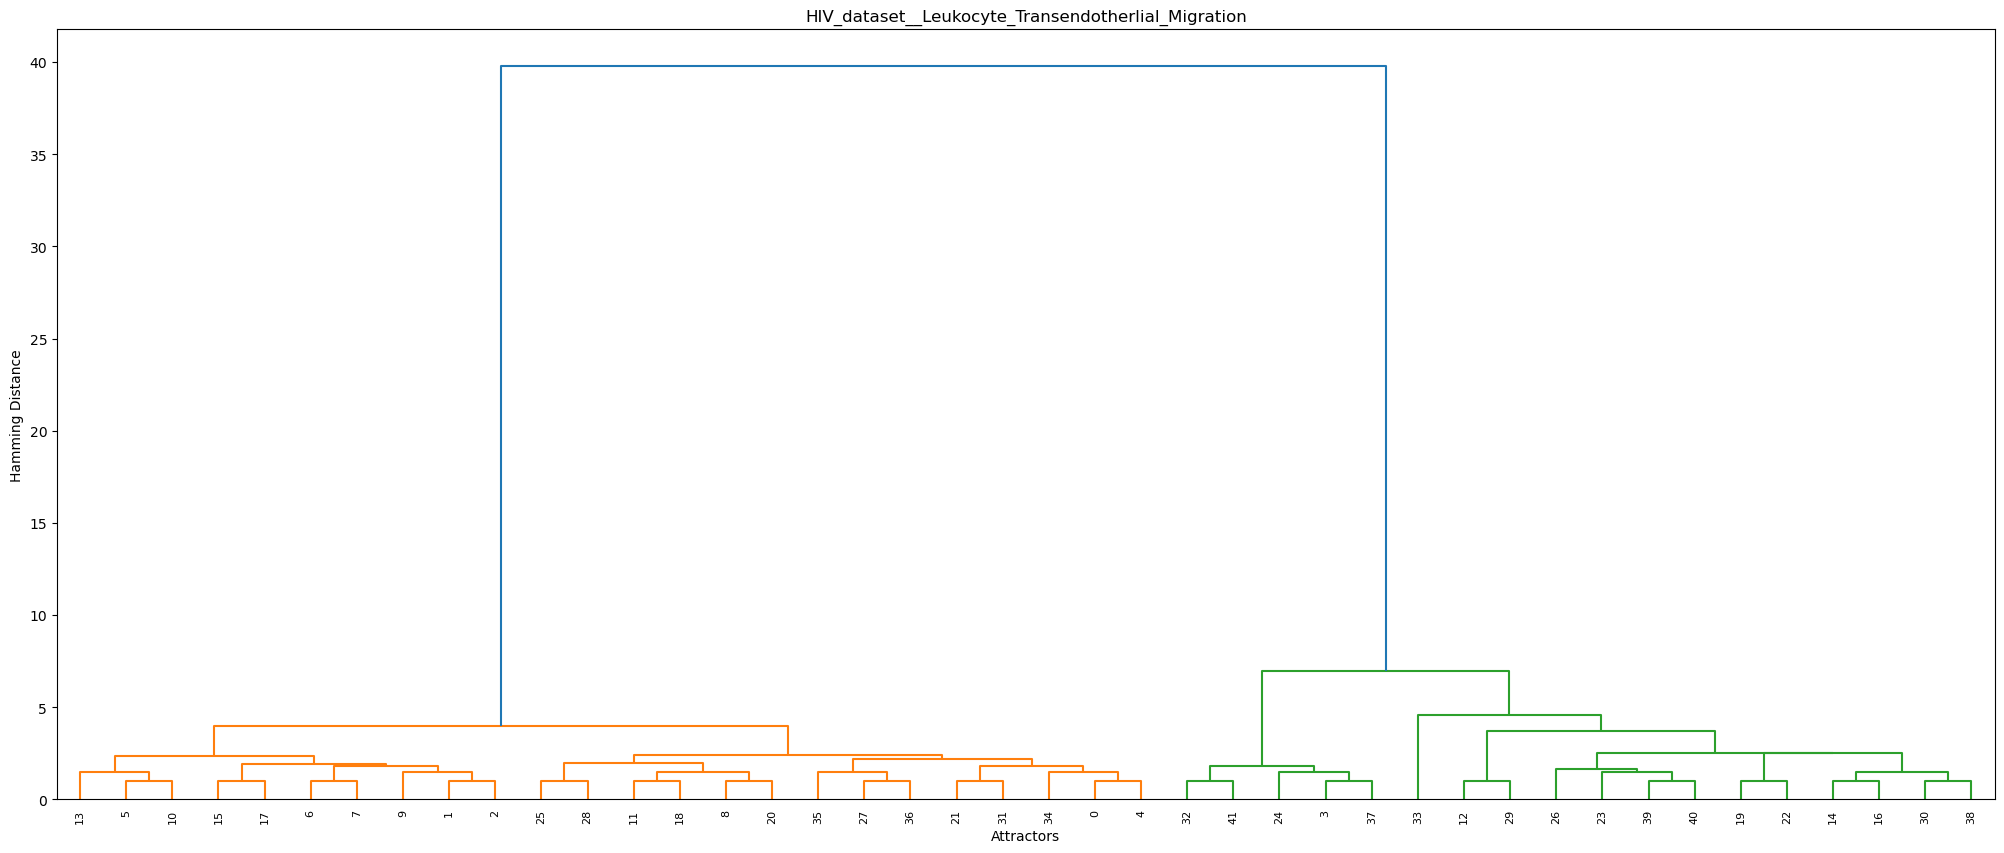

<Figure size 640x480 with 0 Axes>

In [3]:
# Parameters for clustering
distance_threshold = 20
save_truncated_dendrogram = True
save_dendrogram = True
lastp_for_truncate = "clusters_based_2"

# Where figures generated using the Attractors_Clustering function will be saved
dendrogram_saving_pathway = "Example_Dataset/Clustering_Output/"

#Running the function
set_of_clusters_per_dataset = Attractors_Clustering(all_attractors_mapped_to_by_cells, distance_threshold, dendrogram_saving_pathway, lastp_for_truncate, save_truncated_dendrogram=False, save_dendrogram = True)


# Function: Merge_Similar_Attractors

This function merges similar attractors within each cluster to determine representative attractors for each cluster. It utilizes the output from the `Attractors_Clustering` function.

## Parameters:
- `set_of_clusters_per_dataset`: A dictionary with dataset names as keys and values being dictionaries of cluster IDs and their respective attractors.
- `loaded_dist_dfs`: A dictionary with dataset-signaling pathway pairs as keys and dataframes of distances between attractors and cells as values.
- `attractors_per_dtst_ntrk_saving_path`: The directory where CSV files with cluster IDs and representative attractors will be saved.

## Returns:
- `set_of_clusters_with_representative_attractors_per_dataset`: A dictionary with dataset names as keys and values being dictionaries of cluster ID and its representative attractor.

## Example Usage:

```python
# Where figures generated using the Merge_Similar_Attractors function will be saved
attractors_per_dtst_ntrk_saving_path = "Example_Dataset/attractors_per_dtst_ntrk/"

# Running the function
set_of_clusters_with_representative_attractors_per_dataset = Merge_Similar_Attractors(set_of_clusters_per_dataset, loaded_dist_dfs, attractors_per_dtst_ntrk_saving_path)


In [4]:
#Where figures generated using the Merge_Similar_Attractors function will be saved
attractors_per_dtst_ntrk_saving_path="Example_Dataset/attractors_per_dtst_ntrk/"

#Running the function
set_of_clusters_with_representative_attractors_per_dataset = Merge_Similar_Attractors(set_of_clusters_per_dataset, loaded_dist_dfs,attractors_per_dtst_ntrk_saving_path)

Done obtaining distances matrix for HIV_dataset__Leukocyte_Transendotherlial_Migration
Done Finding Representative Attractors in Each Cluster Of 2 Clusters


# Function: Create_Bar_Plot_And_Frequency_Plot

This function generates box plots and bar plots mapping attractors to B cells taken from healthy or ill patients. The function creates combined plots for attractors.

## Parameters:
- `set_of_clusters_with_representative_attractors_per_dataset`: A dictionary with dataset names as keys and values being dictionaries of cluster IDs and their respective representative attractors.
- `loaded_dist_dfs`: A dictionary with dataset-signaling pathway pairs as keys and dataframes of distances between attractors and cells as values.
- `plots_saving_path`: The directory where generated plots will be saved.
- `csv_saving_path`: The directory where generated csv files that include cell names per representative attractor wil be saved.
- `attractors_representing_clusters_indices_to_plot`: A list of attractor indices to plot (empty list to plot all).
- `datasets_cells_labels`: A dictionary specifying the phenotypes/source of B cells in each of the datasets.
- `restrict_attractors_plotted`: A boolean value to specify if plotting should be restricted based on `attractors_representing_clusters_indices_to_plot`.
- `Combined_Plot`: A boolean to specify whether to create a combined plot or not.
- `bar_box_plots_fig_size`: A tuple specifying the size of the generated figure (width, height).

## Example Usage:

```python
# Attractors to plot (leave empty to plot all)
attractors_representing_clusters_indices_to_plot = []

# Should attractors be restricted based on the list above
restrict_attractors_plotted = False

# Datasets and cell labels
datasets_cells_labels = {
    "HIV_dataset": {"Label1": "Healthy", "Label2": "HIV"},
    "Lung_Cancer_dataset": {"Label1": "Normal", "Label2": "Tumor"},
    "Breast_Cancer_dataset": {"Label1": "Before", "Label2": "After"},
    "Mild_Severe_Covid_dataset": {"Label1": "Healthy", "Label2": "COVID"},
    "Severe_Covid_dataset": {"Label1": "Healthy", "Label2": "COVID"},
}

# Where figures will be saved
plots_saving_path = "Example_Dataset/Clustering_Output/"
# where csv files that include cell names per representative attractor wil be saved
csv_saving_path = "Example_Dataset/Cells_Names_Per_Attractors/"

# Running the function
Create_Bar_Plot_And_Frequency_Plot(
    set_of_clusters_with_representative_attractors_per_dataset,
    loaded_dist_dfs,
    plots_saving_path,
    csv_saving_path,
    attractors_representing_clusters_indices_to_plot,
    datasets_cells_labels,
    restrict_attractors_plotted,
    Combined_Plot=True,
    bar_box_plots_fig_size=(12, 4)
)


[1, 2]
num_nodes_in_ntrk: 106
[1, 2]
label1: 1780
label2: 1841
[93.25842696629213, 6.741573033707865]
[0.0, 100.0]



No Cells Mapped to Attractor 1
Adding a nan value to this attractor's distances for it to still be plotted
[nan]
(1660, 120) (0, 1841)
python test:
(1660, 120)
(0, 1841)
0.0
0.000000000000000
3166.4896672934724
1
[[816.01767468 963.98232532]
 [843.98232532 997.01767468]]


/Users/george/Desktop/All_Functions.py:775: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


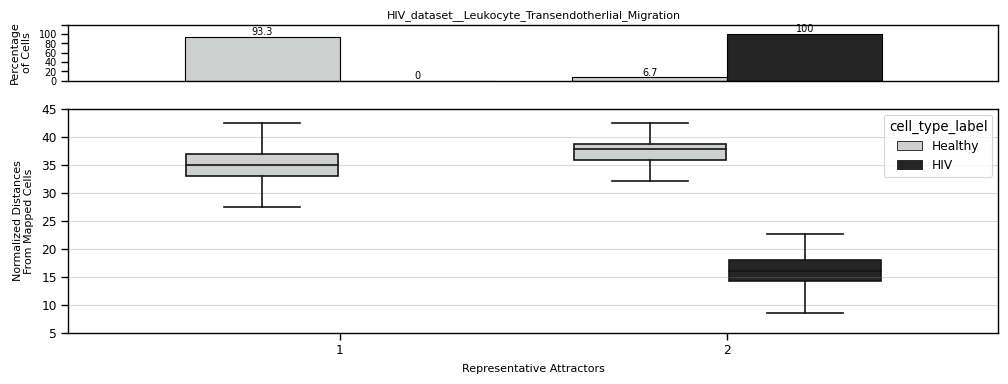

<Figure size 640x480 with 0 Axes>

In [6]:
# Attractors to plot (leave empty to plot all)
attractors_representing_clusters_indices_to_plot = []

# Should attractors be restricted based on the list above
restrict_attractors_plotted = False

# Datasets and cell labels
datasets_cells_labels = {
    "HIV_dataset": {"Label1": "Healthy", "Label2": "HIV"},
    "Lung_Cancer_dataset": {"Label1": "Normal", "Label2": "Tumor"},
    "Breast_Cancer_dataset": {"Label1": "Before", "Label2": "After"},
    "Mild_Severe_Covid_dataset": {"Label1": "Healthy", "Label2": "COVID"},
    "Severe_Covid_dataset": {"Label1": "Healthy", "Label2": "COVID"},
}

# Where figures will be saved
plots_saving_path = "Example_Dataset/Clustering_Output/"
# where csv files that include cell names per representative attractor wil be saved
csv_saving_path = "Example_Dataset/Cells_Names_Per_Attractors/"

# Running the function
Create_Bar_Plot_And_Frequency_Plot(
    set_of_clusters_with_representative_attractors_per_dataset,
    loaded_dist_dfs,
    plots_saving_path,
    csv_saving_path,
    attractors_representing_clusters_indices_to_plot,
    datasets_cells_labels,
    restrict_attractors_plotted,
    Combined_Plot=True,
    bar_box_plots_fig_size=(12, 4)
)